In [1]:
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd  

import os
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline
import matlab.engine

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
os.getcwd()
os.chdir('/Users/sitani/Desktop/CS_final_codes/workonhotspots/')
eng = matlab.engine.start_matlab()
eng.reading_hotspot2Data(nargout=0)
os.chdir('/Users/sitani/Desktop/CS_final_codes/workonhotspots/FinalCodesForPublication/')
os.getcwd()

'/Users/sitani/Desktop/CS_final_codes/workonhotspots/FinalCodesForPublication'

In [3]:
eng.quit()

In [4]:
X=pd.read_csv('Atrain_whole.csv',header=None)
y=pd.read_csv('label_whole.csv',header=None)

X_train = pd.read_csv('Atrain2.csv',header=None)
X_valid = pd.read_csv('Avalid2.csv',header=None)

y_train=pd.read_csv('label_train2.csv',header=None)
y_valid=pd.read_csv('label_valid2.csv',header=None)

X_test=pd.read_csv('Atest2.csv',header=None)
y_test=pd.read_csv('label_test2.csv',header=None)

X_train=X_train.T#transpose
X_valid=X_valid.T
X=X.T
X_test=X_test.T

y_train=y_train.values.ravel()
y_valid=y_valid.values.ravel()
y=y.values.ravel()
y_test=y_test.values.ravel()

print(X_train.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(250, 58)
(63, 58)
(250,)
(63,)


In [5]:
from sklearn.grid_search import GridSearchCV

/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [6]:
# define the parameter values that should be searched
# for python 2, k_range = range(1, 31)
k_range = list(range(1, 40))
print(k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]


In [7]:
# create a parameter grid: map the parameter names to the values that should be searched
# simply a python dictionary
# key: parameter name
# value: list of values that should be searched for that parameter
# single key-value pair for param_grid
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]}


In [8]:
# instantiate the grid
knn = KNeighborsClassifier(n_neighbors=5)
grid = GridSearchCV(knn, param_grid, cv=5, scoring='recall')

In [9]:
# fit the grid with data
grid.fit(X, y)


GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]},
       pre_dispatch='2*n_jobs', refit=True, scoring='recall', verbose=0)

In [10]:
# view the complete results (list of named tuples)
grid.grid_scores_

[mean: 0.62399, std: 0.05445, params: {'n_neighbors': 1},
 mean: 0.37519, std: 0.09965, params: {'n_neighbors': 2},
 mean: 0.62349, std: 0.08424, params: {'n_neighbors': 3},
 mean: 0.44327, std: 0.12838, params: {'n_neighbors': 4},
 mean: 0.60064, std: 0.13630, params: {'n_neighbors': 5},
 mean: 0.47325, std: 0.13780, params: {'n_neighbors': 6},
 mean: 0.57844, std: 0.13734, params: {'n_neighbors': 7},
 mean: 0.42820, std: 0.10954, params: {'n_neighbors': 8},
 mean: 0.54116, std: 0.12124, params: {'n_neighbors': 9},
 mean: 0.44327, std: 0.09773, params: {'n_neighbors': 10},
 mean: 0.54116, std: 0.09371, params: {'n_neighbors': 11},
 mean: 0.46613, std: 0.06388, params: {'n_neighbors': 12},
 mean: 0.54895, std: 0.06131, params: {'n_neighbors': 13},
 mean: 0.47358, std: 0.08727, params: {'n_neighbors': 14},
 mean: 0.54149, std: 0.05277, params: {'n_neighbors': 15},
 mean: 0.48882, std: 0.05356, params: {'n_neighbors': 16},
 mean: 0.54895, std: 0.03845, params: {'n_neighbors': 17},
 mean:

In [12]:
# create a list of the mean scores only
# list comprehension to loop through grid.grid_scores
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
print(grid_mean_scores)

[0.6239862374047678, 0.37519456049807487, 0.6234947161464733, 0.44327025477185217, 0.6006389776357828, 0.47325305152781183, 0.5784386008028181, 0.4281969361841566, 0.5411649053821578, 0.44327025477185217, 0.5411649053821578, 0.4661259932825428, 0.5489473253051529, 0.47358073236667486, 0.5414925862210207, 0.48881789137380194, 0.5489473253051528, 0.5038912099614975, 0.5414925862210208, 0.5191283689686246, 0.5489473253051528, 0.48898173179323334, 0.5568935856475793, 0.4891455722126648, 0.5492750061440158, 0.4515441959531416, 0.5191283689686245, 0.4515441959531416, 0.4966003112967969, 0.4515441959531416, 0.4818546735479643, 0.4366347177848775, 0.4818546735479643, 0.4366347177848775, 0.47423609404440076, 0.44392561644957806, 0.4515441959531416, 0.4215613991971819, 0.43647087736544604]


Text(0,0.5,'Cross-Validated Accuracy')

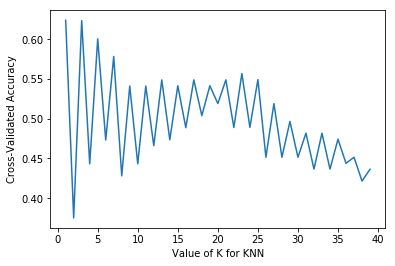

In [13]:
# plot the results
# this is identical to the one we generated above
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')


In [13]:
# examine the best model

# Single best score achieved across all params (k)
print(grid.best_score_)

# Dictionary containing the parameters (k) used to generate that score
print(grid.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid.best_estimator_)

0.6239862374047678
{'n_neighbors': 1}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')


In [14]:
# define the parameter values that should be searched
k_range = list(range(1, 40))

# Another parameter besides k that we might vary is the weights parameters
# default options --> uniform (all points in the neighborhood are weighted equally)
# another option --> distance (weights closer neighbors more heavily than further neighbors)

# we create a list
weight_options = ['uniform', 'distance']
score=['accuracy','f1','precision','recall','roc_auc']


In [15]:
# create a parameter grid: map the parameter names to the values that should be searched
# dictionary = dict(key=values, key=values)
param_grid = dict(n_neighbors=k_range, weights=weight_options)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39], 'weights': ['uniform', 'distance']}


In [20]:
# instantiate and fit the grid
# exhaustive grid-search because it's trying every combination
# 10-fold cross-validation is being performed 30 x 2 = 60 times

grid = GridSearchCV(knn, param_grid, cv=5,scoring='recall')
grid.fit(X_train, y_train)



GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='distance'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, scoring='recall', verbose=0)

In [21]:
# view the complete results
grid.grid_scores_, grid.best_params_, grid.best_score_,
#grid.grid_scores_(min(mean))

([mean: 0.56301, std: 0.06931, params: {'n_neighbors': 1, 'weights': 'uniform'},
  mean: 0.56301, std: 0.06931, params: {'n_neighbors': 1, 'weights': 'distance'},
  mean: 0.30092, std: 0.08348, params: {'n_neighbors': 2, 'weights': 'uniform'},
  mean: 0.56301, std: 0.06931, params: {'n_neighbors': 2, 'weights': 'distance'},
  mean: 0.55291, std: 0.11523, params: {'n_neighbors': 3, 'weights': 'uniform'},
  mean: 0.57243, std: 0.10663, params: {'n_neighbors': 3, 'weights': 'distance'},
  mean: 0.40764, std: 0.08869, params: {'n_neighbors': 4, 'weights': 'uniform'},
  mean: 0.60119, std: 0.13533, params: {'n_neighbors': 4, 'weights': 'distance'},
  mean: 0.59167, std: 0.13686, params: {'n_neighbors': 5, 'weights': 'uniform'},
  mean: 0.59175, std: 0.14476, params: {'n_neighbors': 5, 'weights': 'distance'},
  mean: 0.41690, std: 0.07432, params: {'n_neighbors': 6, 'weights': 'uniform'},
  mean: 0.62098, std: 0.11605, params: {'n_neighbors': 6, 'weights': 'distance'},
  mean: 0.52381, std: 

In [22]:
# train your model using all data and the best known parameters
param1=grid.best_params_["n_neighbors"]
param2=grid.best_params_["weights"]
# instantiate model with best parameters

knn = KNeighborsClassifier(n_neighbors=param1, weights=param2)

# fit with X and y, not X_train and y_train
# even if we use train/valid split, we should train on X and y before making predictions on new data
# otherwise we throw away potential valuable data we can learn from
knn.fit(X_train, y_train)

# make a prediction on out-of-sample data
#knn.predict([3, 5, 4, 2])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='distance')

In [23]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)
#grid.best_params_["n_neighbors"]
# Best score did not improve for this model

0.6209809523809524
{'n_neighbors': 6, 'weights': 'distance'}


In [24]:
y_pred= knn.predict(X_valid) 
    

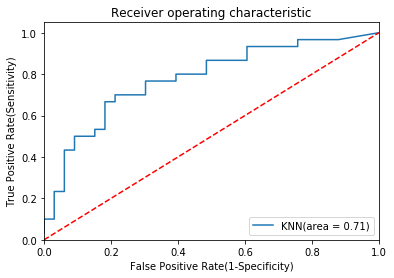

In [25]:
%matplotlib inline
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
knn_roc_auc = roc_auc_score(y_valid, y_pred)
# predict probabilities

probs = knn.predict_proba(X_valid)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
fpr, tpr, thresholds = roc_curve(y_valid, probs)
plt.figure()
plt.plot(fpr, tpr, label='KNN(area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(1-Specificity)')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')
plt.show()

In [28]:
print('Accuracy of KNN classifier: {:.2f}'.format(knn.score(X_valid, y_valid)))
print('\n')
from sklearn.metrics import confusion_matrix
import pandas as pd

confusion_df = pd.DataFrame(confusion_matrix(y_valid,y_pred),
             columns=["Predicted Class " + str(class_name) for class_name in [1,0]],
             index = ["Class " + str(class_name) for class_name in [1,0]])

print('Confusion matrix : \n',confusion_df.T)
print('\n')


cm1 = confusion_matrix(y_valid, y_pred).T
print('\n')
total1=sum(sum(cm1))
print(cm1)
#####from confusion matrix calculate sensitivity specificity


sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[1,0])
print('Sensitivity :', sensitivity1 )
print('\n')
specificity1 = cm1[1,1]/(cm1[0,1]+cm1[1,1])
print('Specificity :', specificity1)
print('\n')
precision = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('precision :', precision)
print('\n')
#from sklearn.metrics import precision_score
#print("Precision score: {}".format(precision_score(y_valid,y_pred)))
#print('\n')
from sklearn.metrics import f1_score
print("F1 Score: {}".format(f1_score(y_valid,y_pred)))
print('\n')
from sklearn.metrics import matthews_corrcoef
print("Matthews Correlation Coefficient: {}".format(matthews_corrcoef(y_valid, y_pred)))
print('\n')
##Area under Curve-AUC
auc = roc_auc_score(y_valid, knn.predict_proba(X_valid)[:,1])
print('AUC: %.3f' % auc)
print('\n')

Accuracy of KNN classifier: 0.71


Confusion matrix : 
                    Class 1  Class 0
Predicted Class 1       24        9
Predicted Class 0        9       21




[[24  9]
 [ 9 21]]
Sensitivity : 0.7272727272727273


Specificity : 0.7


precision : 0.7272727272727273


F1 Score: 0.7


Matthews Correlation Coefficient: 0.42727272727272725


AUC: 0.779




9